<a href="https://colab.research.google.com/github/izzul112/Submission-Time_Series/blob/master/Submission_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data_train = pd.read_csv('monthly-sunspots.csv')
data_train.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [3]:
data_train.isnull().sum()

Month       0
Sunspots    0
dtype: int64

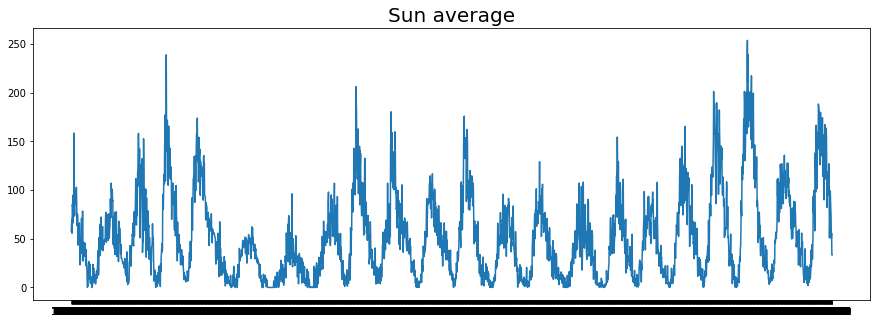

In [4]:
dates = data_train['Month'].values
temp  = data_train['Sunspots'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Sun average',
          fontsize=20);

In [5]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [6]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
# val_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [7]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

28/28 [==============================] - 3s 99ms/step - loss: 50.0157 - mae: 50.5022
Epoch 2/100
28/28 [==============================] - 3s 98ms/step - loss: 49.9172 - mae: 50.4027
Epoch 3/100
28/28 [==============================] - 3s 104ms/step - loss: 49.8336 - mae: 50.3200
Epoch 4/100
28/28 [==============================] - 3s 103ms/step - loss: 49.7574 - mae: 50.2445
Epoch 5/100
28/28 [==============================] - 3s 97ms/step - loss: 49.6620 - mae: 50.1500
Epoch 6/100
28/28 [==